In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [48]:
srcdf = pd.read_csv('/Case_2_loan_Default_classification/loan.csv')

In [49]:
pd.set_option('display.max_columns', 41)

In [50]:
srcdf.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [51]:
srcdf.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

## Checking for NULL Values

In [52]:
srcdf.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

## Replacing . with _ in the column names as it is not being recognised as column names in pandas library

In [53]:
tmpColumns = {}
tmpcolumns = list(srcdf.columns)
for i in srcdf.columns:
    if ('.' in i):
        tmpColumns.update({tmpcolumns[tmpcolumns.index(i)]: i.replace('.','_')})

In [54]:
tmpColumns

{'Date.of.Birth': 'Date_of_Birth',
 'Employment.Type': 'Employment_Type',
 'PERFORM_CNS.SCORE': 'PERFORM_CNS_SCORE',
 'PERFORM_CNS.SCORE.DESCRIPTION': 'PERFORM_CNS_SCORE_DESCRIPTION',
 'PRI.NO.OF.ACCTS': 'PRI_NO_OF_ACCTS',
 'PRI.ACTIVE.ACCTS': 'PRI_ACTIVE_ACCTS',
 'PRI.OVERDUE.ACCTS': 'PRI_OVERDUE_ACCTS',
 'PRI.CURRENT.BALANCE': 'PRI_CURRENT_BALANCE',
 'PRI.SANCTIONED.AMOUNT': 'PRI_SANCTIONED_AMOUNT',
 'PRI.DISBURSED.AMOUNT': 'PRI_DISBURSED_AMOUNT',
 'SEC.NO.OF.ACCTS': 'SEC_NO_OF_ACCTS',
 'SEC.ACTIVE.ACCTS': 'SEC_ACTIVE_ACCTS',
 'SEC.OVERDUE.ACCTS': 'SEC_OVERDUE_ACCTS',
 'SEC.CURRENT.BALANCE': 'SEC_CURRENT_BALANCE',
 'SEC.SANCTIONED.AMOUNT': 'SEC_SANCTIONED_AMOUNT',
 'SEC.DISBURSED.AMOUNT': 'SEC_DISBURSED_AMOUNT',
 'PRIMARY.INSTAL.AMT': 'PRIMARY_INSTAL_AMT',
 'SEC.INSTAL.AMT': 'SEC_INSTAL_AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS': 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS': 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'AVERAGE.ACCT.AGE': 'AVERAGE_ACCT_AGE',
 'CREDIT.

In [55]:
srcdf = srcdf.rename(columns=tmpColumns)

In [56]:
srcdf.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [57]:
Description = ['Id- Will be excluded', 'Disbursed loan amount (Target value for case 3)', 'Asset cost', 'Total Value', 'Id- Will be excluded',
       'Id- Will be excluded', 'Id- Will be excluded', 'Id- Will be excluded', 'Id- Will be excluded',
       'Id- Will be excluded', 'MobileNo Given or not', 'Aadhar Given or not', 'PAN Given or not',
       'VoterID Given or not', 'Driving ID Given or not', 'Passport Given or not', 'Credit score',
       'No. of Accts', 'Primary Active Accts', 'Primary Overdue Accts',
       'Pimary Acc Bal', 'Primary sanctioned Amnt', 'Primary disbursed Amnt',
       'Secondary No. of Accts', 'Secondary Active Accts', 'Secondary Overdue Accts',
       'Secondary Acct Bal', 'Secondary Sanctioned Amnt', 'Secondary Disbursed Amnt',
       'Primary Instalment Amnt', 'Secondary Instalment Amnt', 'New Accts in last 6 months',
       'Delinquent Accts in last 6 months', 'No of Inquires',
       'loan_default (Target value for case 2)']

In [58]:
pd.DataFrame({'Data_type':srcdf.select_dtypes([np.number]).dtypes,
             'Description':Description}).style.background_gradient(cmap='viridis')

,Data_type,Description
UniqueID,int64,Id- Will be excluded
disbursed_amount,int64,Disbursed loan amount (Target value for case 3)
asset_cost,int64,Asset cost
ltv,float64,Total Value
branch_id,int64,Id- Will be excluded
supplier_id,int64,Id- Will be excluded
manufacturer_id,int64,Id- Will be excluded
Current_pincode_ID,int64,Id- Will be excluded
State_ID,int64,Id- Will be excluded
Employee_code_ID,int64,Id- Will be excluded


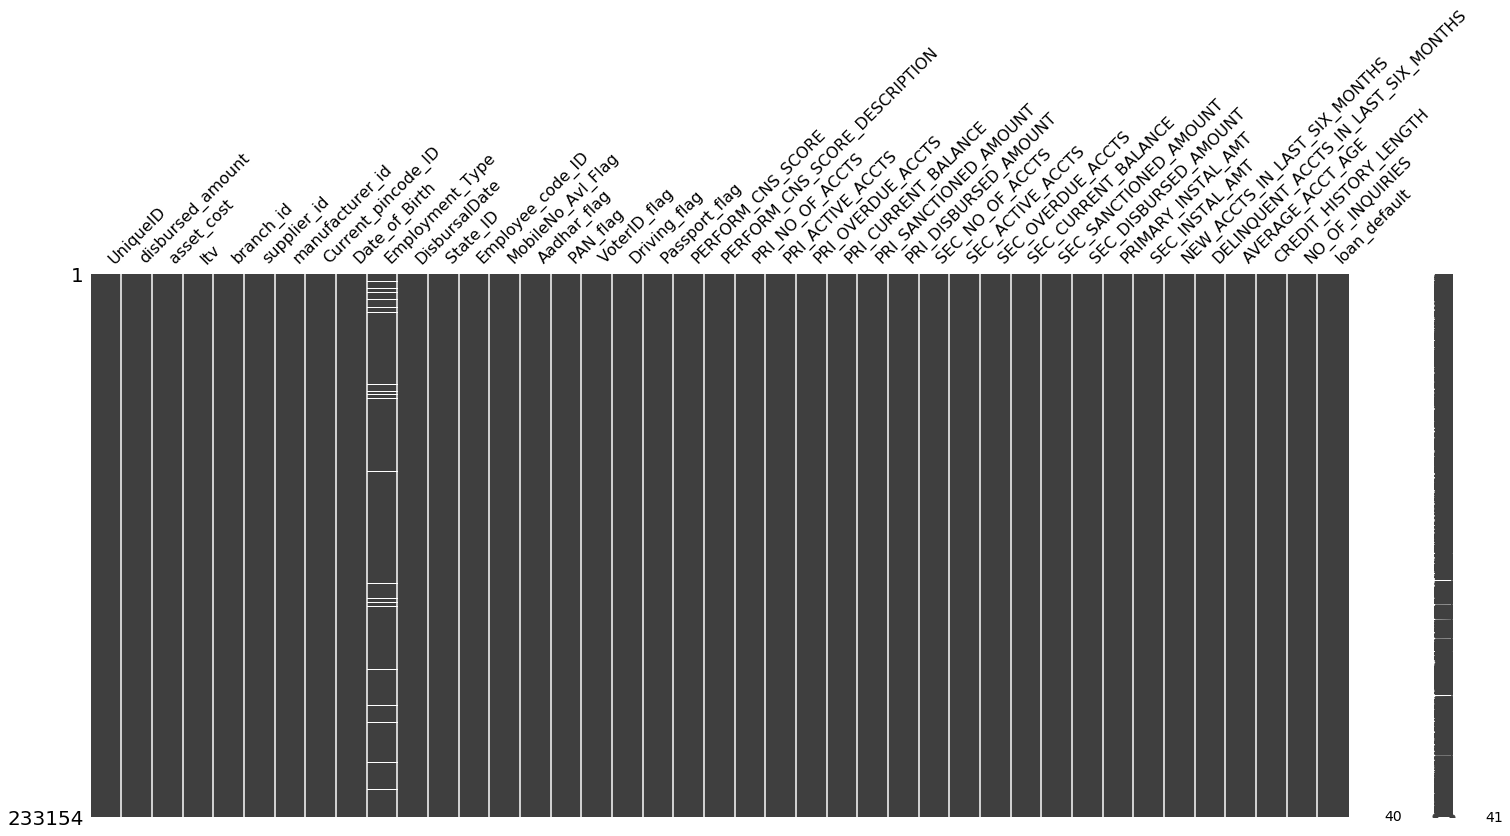

In [59]:
msno.matrix(srcdf)

## Balancing an unbalanced Dataset

[Text(0.5, 1.0, 'Unbalanced dataset')]

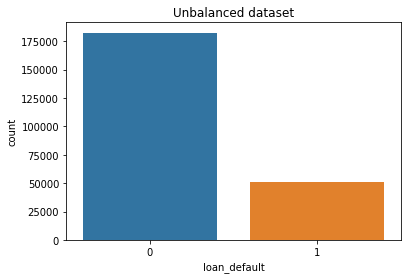

In [60]:
# Unbalanced dataset
sns.countplot(x='loan_default',data=srcdf).set(title="Unbalanced dataset")

In [61]:
# Balancing dataset
from sklearn.utils import resample
not_default = srcdf[srcdf.loan_default==0]
default = srcdf[srcdf.loan_default==1]

# upsample minority
resampled = resample(not_default,
                          replace=True, # sample with replacement
                          n_samples=len(default)+10000, # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
#upsampled = pd.concat([not_fraud, fraud_upsampled])
final_df = pd.concat([resampled,default],ignore_index=True)

In [62]:
final_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,616512,35089,71100,50.98,29,22746,86,5898,01-02-90,Self employed,25-10-18,3,1622,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,424443,48739,62290,80.65,69,16611,45,4083,13-03-86,Salaried,06-08-18,8,2072,1,1,0,0,0,0,686,E-Low Risk,5,2,0,0,96000,96000,0,0,0,0,0,0,0,0,0,1,2yrs 5mon,4yrs 0mon,0,0
2,462742,61947,110132,58.11,36,16010,120,6607,01-01-88,Salaried,24-08-18,13,145,1,0,1,1,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,510354,55259,71567,79.65,9,18062,86,5422,10-01-72,Self employed,16-09-18,3,943,1,1,0,0,0,0,738,C-Very Low Risk,4,2,0,28544,51835,51835,0,0,0,0,0,0,4227,0,1,0,0yrs 7mon,1yrs 1mon,0,0
4,507144,57013,98130,60.12,1,13890,86,4996,10-06-95,Salaried,14-09-18,3,601,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1522,0,0,0,0yrs 6mon,0yrs 6mon,0,0


[Text(0.5, 1.0, 'Balanced Dataset')]

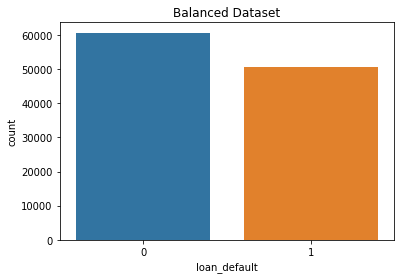

In [63]:
sns.countplot(x='loan_default',data=final_df).set(title='Balanced Dataset')

## Exploratory Data Analysis

In [64]:
final_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,616512,35089,71100,50.98,29,22746,86,5898,01-02-90,Self employed,25-10-18,3,1622,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,424443,48739,62290,80.65,69,16611,45,4083,13-03-86,Salaried,06-08-18,8,2072,1,1,0,0,0,0,686,E-Low Risk,5,2,0,0,96000,96000,0,0,0,0,0,0,0,0,0,1,2yrs 5mon,4yrs 0mon,0,0
2,462742,61947,110132,58.11,36,16010,120,6607,01-01-88,Salaried,24-08-18,13,145,1,0,1,1,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,510354,55259,71567,79.65,9,18062,86,5422,10-01-72,Self employed,16-09-18,3,943,1,1,0,0,0,0,738,C-Very Low Risk,4,2,0,28544,51835,51835,0,0,0,0,0,0,4227,0,1,0,0yrs 7mon,1yrs 1mon,0,0
4,507144,57013,98130,60.12,1,13890,86,4996,10-06-95,Salaried,14-09-18,3,601,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1522,0,0,0,0yrs 6mon,0yrs 6mon,0,0


Text(0.5, 1.0, 'Loan_Default count between salaried and self employed')

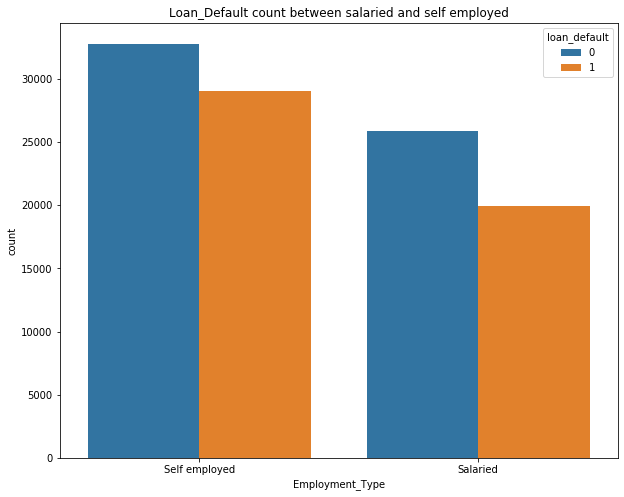

In [65]:
fig = plt.figure(figsize=(10,8))
sns.countplot(x='Employment_Type',hue='loan_default', data=final_df)
plt.title('Loan_Default count between salaried and self employed')

## Data Preprocessing

In [66]:
df_cont = pd.DataFrame()

In [67]:
df_cont['disbursed_amount'] = final_df['disbursed_amount']
df_cont['asset_cost'] = final_df['asset_cost']
df_cont['ltv'] = final_df['ltv']

In [68]:
df_cont.head()

,disbursed_amount,asset_cost,ltv
0,35089,71100,50.98
1,48739,62290,80.65
2,61947,110132,58.11
3,55259,71567,79.65
4,57013,98130,60.12


In [69]:
final_df.Employment_Type.value_counts()

Self employed    61852
Salaried         45775
Name: Employment_Type, dtype: int64

In [70]:
df_cont['Employment_Type'] = final_df['Employment_Type']

## Change the salary type into 0 and 1 as a categorical variable using Ordinal encoder

In [71]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
oe = OrdinalEncoder()
tmp_employment_type = df_cont['Employment_Type']
nonull = np.array(df_cont['Employment_Type'].dropna())

In [73]:
encoded_values = oe.fit_transform(nonull.reshape(-1,1))

In [74]:
tmp_employment_type[tmp_employment_type.notnull()] = np.squeeze(encoded_values)

In [75]:
df_cont['Employment_Type'] = tmp_employment_type

In [76]:
df_cont.Employment_Type.value_counts()

1.0    61852
0.0    45775
Name: Employment_Type, dtype: int64

In [77]:
df_cont.Employment_Type.isnull().sum()

3595

In [78]:
tmpdf = pd.DataFrame(final_df.iloc[:,[13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40]])

In [79]:
df_cont = pd.concat([df_cont,tmpdf],sort=False,axis=1)

In [80]:
df_cont.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
Employment_Type                        3595
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE                       0
SEC_SANCTIONED_AMOUNT                     0
SEC_DISBURSED_AMOUNT            

In [81]:
tmpcolumns = list(df_cont.columns)

In [82]:
#from fancyimpute import IterativeImputer as MICE
from sklearn.impute import KNNImputer

## Need to round of the values. By defalut KNN Imputer will give float variables. As Our Category contains 0's and 1's We have to round up the imputed values

In [83]:
#df_cont = pd.DataFrame(MICE().fit_transform(df_cont.astype(str)),columns=tmpcolumns)
imputer = KNNImputer(n_neighbors=5)
df_cont = pd.DataFrame(np.round(imputer.fit_transform(df_cont)),columns=tmpcolumns)

In [84]:
df_cont.Employment_Type.value_counts()

1.0    64166
0.0    47056
Name: Employment_Type, dtype: int64

In [85]:
X = df_cont.drop(['loan_default'],axis=1)

In [86]:
y= df_cont['loan_default']

In [87]:
len(X),len(y)

(111222, 111222)

In [88]:
display(X.head(),y.head())

,disbursed_amount,asset_cost,ltv,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES
0,35089.0,71100.0,51.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48739.0,62290.0,81.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,686.0,5.0,2.0,0.0,0.0,96000.0,96000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,61947.0,110132.0,58.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55259.0,71567.0,80.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,738.0,4.0,2.0,0.0,28544.0,51835.0,51835.0,0.0,0.0,0.0,0.0,0.0,0.0,4227.0,0.0,1.0,0.0,0.0
4,57013.0,98130.0,60.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,825.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1522.0,0.0,0.0,0.0,0.0


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: loan_default, dtype: float64

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [90]:
#Feature scaling to be done if we are using any algorithm which would work based on the distance
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [91]:
X_train.shape,X_test.shape

((88977, 28), (22245, 28))

## Successfully removed the null values and done with encoding as well. We can start applying Classification models

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import utils
import numpy as np
from sklearn import svm
from sklearn import model_selection,metrics
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## KNN Classifier

In [56]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
y_pred = knn.predict(X_test)

In [54]:
round(metrics.accuracy_score(y_test, y_pred)*100,2)

56.97

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[7703, 4429],
       [5142, 4971]])

In [58]:
import pygal
from IPython.display import display, HTML
from pygal.style import RedBlueStyle

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
def plot_cm(y_test, y_pred):
    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    dot_chart = pygal.Dot(x_label_rotation=30, interpolate='cubic', style=RedBlueStyle)
    dot_chart.title = 'Confusion Matrix'
    dot_chart.x_labels = labels
    dot_chart.x_title = "Predicted"
    dot_chart.y_title = "Actual"
    for i in range(len(labels)):
        dot_chart.add(labels[i], cm[i,:])
    galplot(dot_chart)
    
plot_cm(y_test.astype(str), y_pred.astype(str))

In [59]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0.0   1.0
Actual               
0.0        7703  4429
1.0        5142  4971


(0, 2)

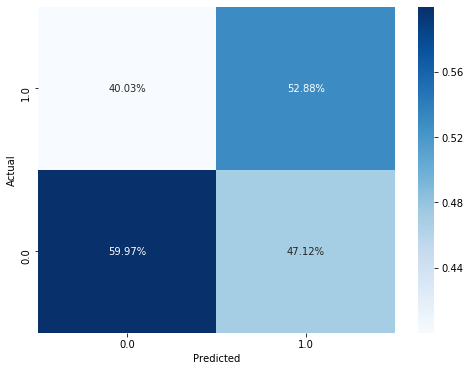

In [61]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_ylim([0,2])

(0, 2)

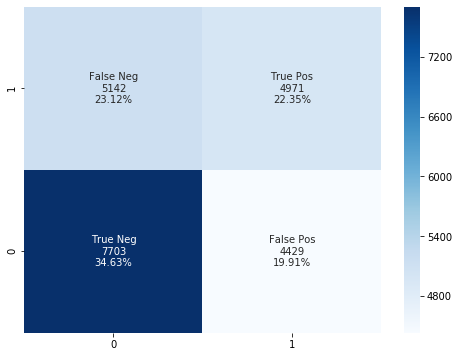

In [66]:
fig, ax = plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_ylim([0,2])

In [72]:
acc_arr = []
for i in range(10,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc_arr.append(round(metrics.accuracy_score(y_test, y_pred)*100,2))

Text(0, 0.5, 'Accuracy of the model')

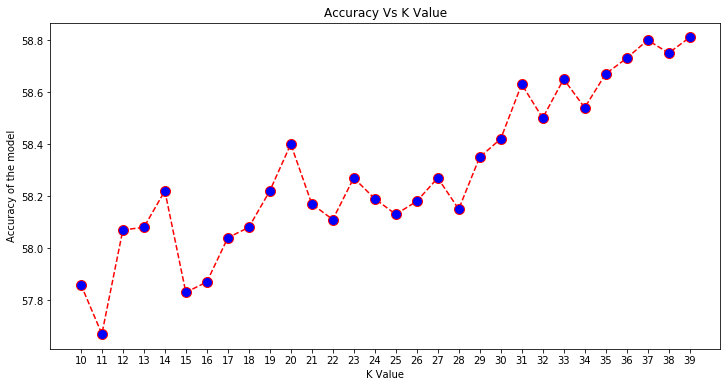

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(range(10, 40), acc_arr, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.xticks(range(10, 40))
plt.ylabel('Accuracy of the model')

In [111]:
knn = KNeighborsClassifier(metric='euclidean',n_neighbors = 37)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [112]:
knn_acc = round(metrics.accuracy_score(y_test, y_pred)*100,2)
knn_acc

58.8

In [116]:
knn_prec = round(precision_score(y_test, y_pred)*100,2)
knn_recall = round(recall_score(y_test, y_pred)*100,2)
knn_prec,knn_recall

(55.39, 48.2)

(0, 2)

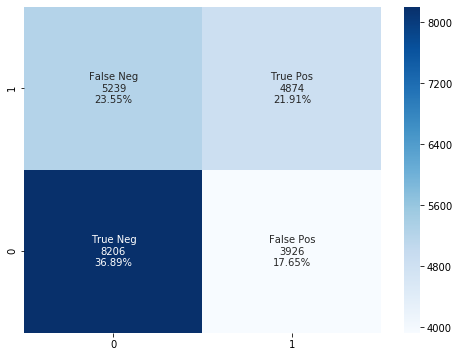

In [82]:
fig, ax = plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_ylim([0,2])

## Linear Support Vector Machine

In [94]:
from sklearn.kernel_approximation import RBFSampler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_train_features = rbf_feature.fit_transform(X_train)
X_test_features = rbf_feature.fit_transform(X_test)

In [95]:
from sklearn.svm import LinearSVC

#Create a svm Classifier
clf = LinearSVC(C=20,random_state=1) # Linear Kernel

In [138]:
#Train the model using the training sets
clf.fit(X_train_features, y_train)

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [139]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_features)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [141]:
clf_acc =  round(metrics.accuracy_score(y_test, y_pred)*100,2)
clf_prec = round(precision_score(y_test, y_pred)*100,2)
clf_recall = round(recall_score(y_test, y_pred)*100,2)
clf_prec,clf_recall

(47.83, 0.76)

In [154]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted    0.0  1.0
Actual               
0.0        11272  860
1.0         9367  746


(0, 2)

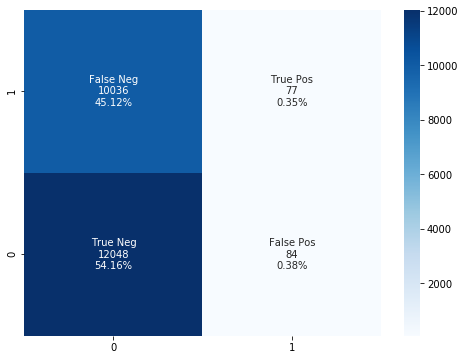

In [142]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_ylim([0,2])

In [96]:
various_c = [0.01,10,50,100,300,600,1000,5000,10000]
acc_arr = []
for i in various_c:
    clf = LinearSVC(C=i,random_state=1)
    clf.fit(X_train_features, y_train)
    y_pred = clf.predict(X_test_features)
    acc_arr.append(round(metrics.accuracy_score(y_test, y_pred)*100,2))

Text(0, 0.5, 'Accuracy of the model')

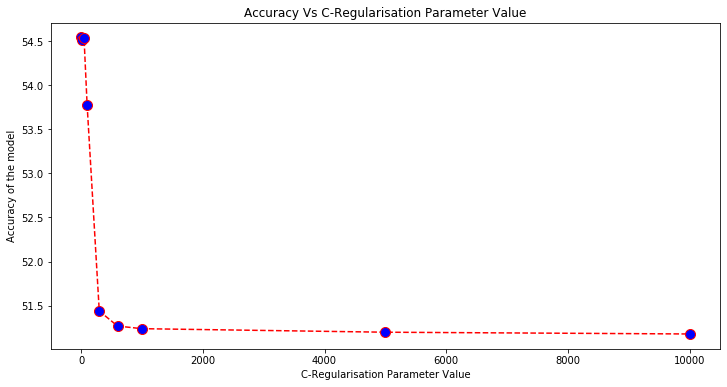

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(various_c, acc_arr, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Vs C-Regularisation Parameter Value')
plt.xlabel('C-Regularisation Parameter Value')
#plt.xticks(various_c)
plt.ylabel('Accuracy of the model')

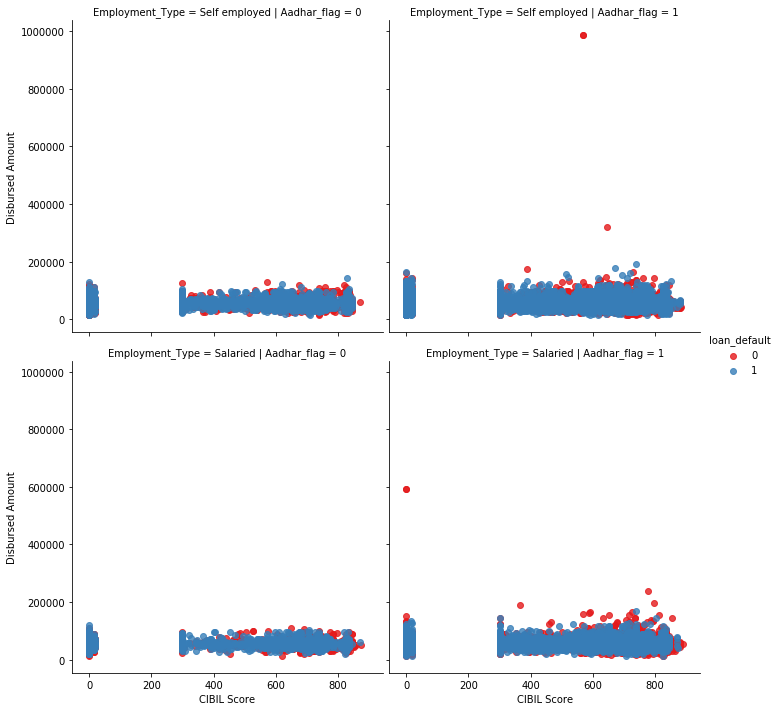

In [100]:
g = sns.lmplot(x="PERFORM_CNS_SCORE", y="disbursed_amount", row="Employment_Type", col="Aadhar_flag",
               data=final_df,hue='loan_default',palette='Set1', fit_reg=False)
g = (g.set_axis_labels("CIBIL Score", "Disbursed Amount")
#     .set(xlim=(0, 60), ylim=(0, 12),
#           xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.02))

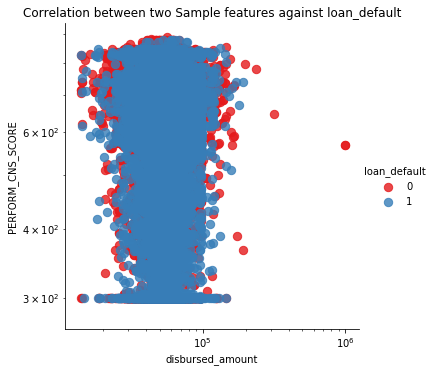

In [174]:
# Plot two ingredients
sns.lmplot('disbursed_amount','PERFORM_CNS_SCORE', data=final_df, hue='loan_default',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}).set(xscale="log", yscale="log",
                    title="Correlation between two Sample features against loan_default")

## Recursive Feature selection Algorithm implementation

In [98]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
tmp_df_rfe = final_df.sample(n=100, random_state=1)
X1,y1 = tmp_df_rfe.drop(['loan_default'],axis=1),tmp_df_rfe['loan_default']
estimator = LinearSVC(random_state=1)
selector = RFE(estimator, 6, step=1)
selector = selector.fit(X, y)

In [99]:
pd.DataFrame({'X-Features Name':X_train.columns,'Important or Not as per RFE':selector.support_,
             'Feature Ranking as per RFE':selector.ranking_}).style.background_gradient(cmap='vlag')

,X-Features Name,Important or Not as per RFE,Feature Ranking as per RFE
0,disbursed_amount,False,13
1,asset_cost,False,11
2,ltv,False,9
3,Employment_Type,False,2
4,MobileNo_Avl_Flag,False,7
5,Aadhar_flag,True,1
6,PAN_flag,False,3
7,VoterID_flag,False,4
8,Driving_flag,True,1
9,Passport_flag,False,20


In [100]:
# Support Vector Machine with RFE Extracted features
tmp_X_train = X_train[['Aadhar_flag','Driving_flag','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','NO_OF_INQUIRIES']]
tmp_X_test = X_test[['Aadhar_flag','Driving_flag','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','NO_OF_INQUIRIES']]


ml_model = LinearSVC(random_state=1)
ml_model.fit(tmp_X_train,y_train)
y_pred_rfe = ml_model.predict(tmp_X_test)


In [146]:
clf_rfe_acc = round(metrics.accuracy_score(y_test, y_pred_rfe)*100,2)
clf_rfe_prec = round(precision_score(y_test, y_pred_rfe)*100,2)
clf_rfe_recall = round(recall_score(y_test, y_pred_rfe)*100,2)
clf_rfe_prec,clf_rfe_recall

(55.16, 23.51)

In [149]:
final_res_df = pd.DataFrame({'ML Models' : ['K-Nearest Neighbours','LinearSVC','LinearSVC with RFE extracted Features'],
              'Accuracy in %' : [knn_acc,clf_acc,clf_rfe_acc],
             'Precision in %':[knn_prec,clf_prec,clf_rfe_prec],
             'Recall in %':[knn_recall,clf_recall,clf_rfe_recall]})

final_res_df.style.background_gradient(cmap=sns.light_palette("violet", as_cmap=True))

,ML Models,Accuracy in %,Precision in %,Recall in %
0,K-Nearest Neighbours,58.8,55.39,48.2
1,LinearSVC,54.51,47.83,0.76
2,LinearSVC with RFE extracted Features,56.54,55.16,23.51
